## Aufgabe 9

In [1]:
a <- function(n, f) {
  
    samples = f(n)
    arithmetic_mean = mean(samples)
    empiric_median = median(samples)
    return(c(num_samples=n, mean=arithmetic_mean, median=empiric_median))
}

normal_stud_t5 = function(n) {
    sqrt(3/5) * rt(n, df=5)
}

normal_stud_t3 = function(n) {
    sqrt(1/3) * rt(n, df=3)
}

print("Normal distribution")
print(sapply(c(20, 40, 80, 160), a, f=rnorm))
print("Normalized Student t5 distribution")
print(sapply(c(20, 40, 80, 160), a, f=normal_stud_t5))
print("Normalized Student t3 distribution")
print(sapply(c(20, 40, 80, 160), a, f=normal_stud_t3))

[1] "Normal distribution"
                  [,1]        [,2]        [,3]        [,4]
num_samples 20.0000000 40.00000000 80.00000000 160.0000000
mean        -0.2685494 -0.01569288 -0.04939090  -0.1537488
median      -0.1586337 -0.05276703 -0.03025642  -0.1789848
[1] "Normalized Student t5 distribution"
                   [,1]        [,2]        [,3]         [,4]
num_samples 20.00000000 40.00000000 80.00000000 160.00000000
mean        -0.08858792 -0.03437792 -0.01324570  -0.01876639
median      -0.14793654 -0.11015700 -0.02082898  -0.03529512
[1] "Normalized Student t3 distribution"
                    [,1]         [,2]        [,3]          [,4]
num_samples 20.000000000 40.000000000 80.00000000 160.000000000
mean         0.405470642 -0.007724744  0.08649164  -0.001941723
median       0.008685957  0.026668436  0.12413018   0.023141840


In [5]:
multiple_times <- function(num_repeats, reps, f) {
    exps = replicate(num_repeats, sapply(reps, a, f=f), simplify=T)
    as_mat = matrix(exps, ncol=num_repeats)
    variances <- matrix(apply(X=as_mat, MARGIN=1, var), nrow=3)[c(2,3),]
}

num_repeats = 2000
var_rnorm = multiple_times(num_repeats, c(20, 40, 80, 160), rnorm)
var_t5 = multiple_times(num_repeats, c(20, 40, 80, 160), normal_stud_t5)
var_t3 = multiple_times(num_repeats, c(20, 40, 80, 160), normal_stud_t3)


In [6]:
print("Matrix of variance of mean, median per sample count")
var_rnorm
var_t5
var_t3

print("Quotients")
quotients = c(normal_=var_rnorm[1, ] / var_rnorm[2, ],
              t5_=var_t5[1, ] / var_t5[2, ],
              t3_=var_t3[1, ] / var_t3[2, ])
quotients

[1] "Matrix of variance of mean, median per sample count"


0.05260534,0.02532157,0.01287094,0.005895613
0.07621171,0.03814913,0.01942235,0.009588263


0.04960658,0.02443244,0.01245273,0.006561097
0.04990550,0.02535232,0.01314550,0.006655180


0.05358718,0.02653012,0.012549946,0.006192022
0.03165685,0.01516869,0.007836733,0.003790180


[1] "Quotients"


normal_1  normal_2  normal_3  normal_4      t5_1      t5_2      t5_3      t5_4 
0.6902527 0.6637522 0.6626868 0.6148781 0.9940103 0.9637162 0.9473002 0.9858632 
     t3_1      t3_2      t3_3      t3_4 
1.6927514 1.7490054 1.6014258 1.6337013

## Aufgabe 10

$L({\hat{\theta}}) = \prod_{i=1}^n\hat{\theta} e^{-\hat{\theta}} x_i= \hat{\theta}^n e^{-\hat{\theta}}\sum^n_{i=1} x_i=\hat{\theta}^n e^{-\hat{\theta}} n\bar{x}$

Log likelihood:
$LL(\hat{\theta}) = n*log(\hat{\theta})-\hat{\theta} n \bar{x}$

Derive:
$LL'(\hat{\theta}) = -\frac{n(\hat{\theta} \bar{x} -1)}{\hat{\theta}}$

$LL'(\hat{\theta}) = 0 \Leftrightarrow \hat{\theta} = \frac{1}{\bar{x}} $

Also stimmt der ML Schätzer.

In [7]:
samples = rexp(100, rate=0.5)
estimate = 1 / mean(samples)

In [8]:
ll <- function(x, theta)
{
    -sum(dexp(x,rate=theta,log=T))
}

numeric_estimate = optimize(f=ll,x=samples, interval=c(0, 1))

c(numeric_estimate=numeric_estimate$minimum, estimate=estimate, quotient=numeric_estimate$minimum/estimate)

numeric_estimate         estimate         quotient 
       0.5498950        0.5498875        1.0000136

## Aufgabe 11

In [115]:
install.packages("PASWR")

Installing package into ‘/home/veith/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [116]:
library("PASWR")

Loading required package: e1071
Loading required package: MASS
Loading required package: lattice


In [117]:
data(Grocery)

I would think the assumption of normal distribution is not correct,
since the distribution of money is not normal, but richer people usually have less children.

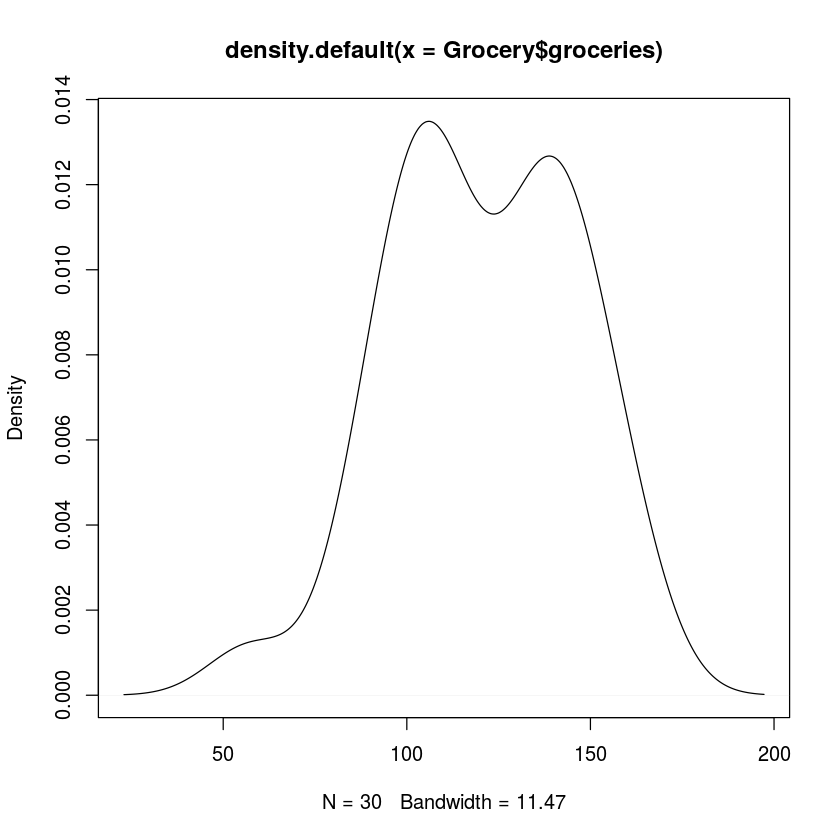

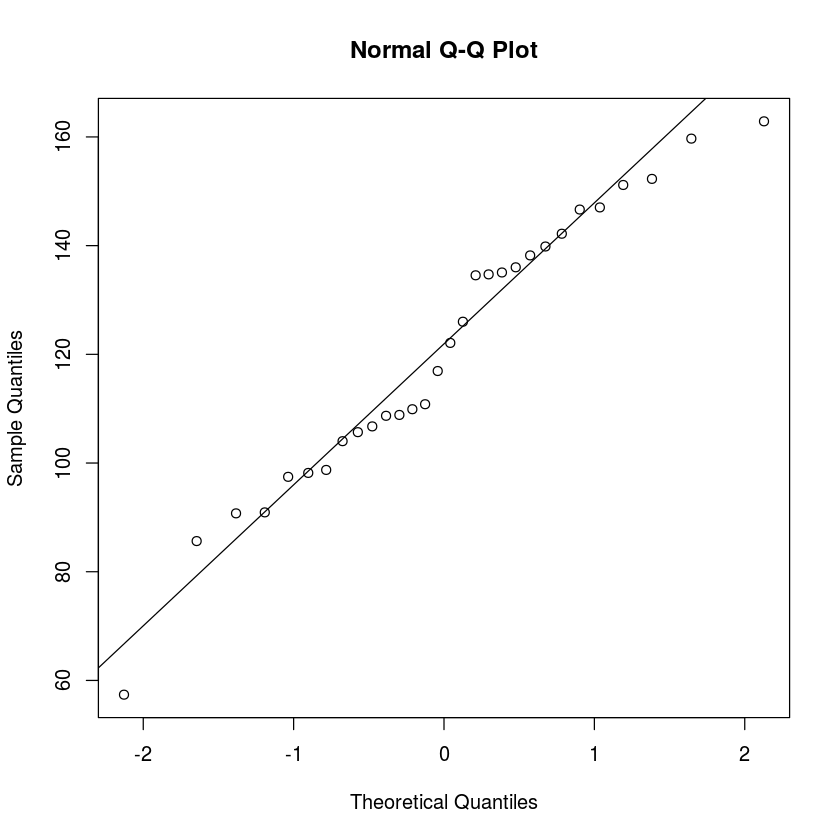

In [120]:
plot(density(Grocery$groceries))
qqnorm(Grocery$groceries)
qqline(Grocery$groceries)

In [128]:
conf_interval = function(sure, sample, sd) 
{
    n = length(sample)
    sample_mean = mean(sample)
    error = qnorm(sure) * sd / sqrt(n)
    left = sample_mean - error
    right = sample_mean + error
    c(left=left, right=right)
}

conf_interval(0.97, Grocery$groceries, sqrt(900))
conf_interval(0.99, Grocery$groceries, sqrt(900))

left    right 
110.3318 130.9349

left    right 
107.8914 133.3753